## Problem
You are faced repeatedly with a choice among n different options, or actions. After each choice you receive a
numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections,
or time steps.

## Exploring and exploiting
Let expected or mean of reward of each action be called its *value*. At any time step if we choose best possible action as highest of our observed values of all actions. We call such action *greedy* and this process is called *exploiting*. If we choose one of the nongreedy action, this process will be called *exploration* because this may improve observed values of nongreedy actions which may be optimal.

## Action value method
we denote the true (actual) value of action a as $q∗(a)$, and the estimated value on the tth time step as $Q_t(a)$. If by the $t^{th}$ time step action $a$ has been chosen $K_a$ times prior to $t$, yielding rewards $R_1, R_2,...R_{K_a}$, then its value is estimated to be: 
$$Q_t(a) = \frac{R_1 + R_2 + .... + R_{K_a}}{K_a}$$




#### Optimized way to update mean
Let mean at time t is $m_t$. Let new observation at time $t+1$ is $x_{t+1}$.
$$
\begin{align}
m_t &= \frac{x_1 + x_2 + ....... + x_t}{t} \tag{1} \\
m_{t+1} &= \frac{x_1 + x_2 + ....... + x_t + x_{t+1}}{t+1} \\
&= \frac{m_t*t + x_{t+1}}{t+1} && \text{by (1)} \\
&= \frac{m_t*t + m_t -m_t + x_{t+1}}{t+1}  \\
&= \frac{m_t(t + 1) + (x_{t+1}-m_t)}{t+1}  \\
m_{t+1} &= m_t + \frac{x_{t+1}-m_t}{t+1}
\end{align}
$$



In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [23]:
#np.random.seed(seed=2017)

# Environment code
class Bandit:
    def __init__(self,n):
        self.n = n
        self.q_star_arr = np.random.normal(size=self.n)
        
    # get reward R
    def reward(self,a): 
        return np.random.normal(loc=self.q_star_arr[a])
    
    def getOptimal(self):
        return self.q_star_arr.argmax()

In [24]:
class ActionValue:
    def __init__(self,n,eta,bandit,max_t = 1000):
        self.n = n
        self.bandit = bandit
        self.max_t = max_t
        self.Qta = np.zeros(n)
        self.Ka = np.zeros(n,dtype=int)
        self.optimalHistory = np.zeros(max_t)
        self.eta = eta        
        self.rewardHistory = np.zeros(max_t)
        self.algoRun()
    
    def algoRun(self):
        for t in range(self.max_t):
            greedyAction = self.Qta.argmax()
            
            if np.random.rand() < self.eta:#exploring
                curAction = np.random.randint(self.n -1)            
                #not to use greedyAction so
                if curAction>=greedyAction:
                    curAction += 1
            else:#exploiting
                curAction = greedyAction
                
            self.optimalHistory[t] = 1 if curAction == self.bandit.getOptimal() else 0
            curActionReward = self.bandit.reward(curAction)
            self.rewardHistory[t] = curActionReward
            self.Ka[curAction] += 1
            #update Qt(a)
            self.Qta[curAction] += (curActionReward - self.Qta[curAction])/self.Ka[curAction]            
            
# n =10
# bandit = Bandit(10)
# print(bandit.q_star_arr)
# max_t = 1000
# a1 = ActionValue(n,0.1,bandit,max_t=max_t)
# a1.algoRun()
# print(a1.Ka)
# a2 = ActionValue(n,0.01,bandit,max_t=max_t)
# a2.algoRun()
# print(a2.Ka)
# a3 = ActionValue(n,0.0,bandit,max_t=max_t)
# a3.algoRun()
# print(a3.Ka)

In [25]:
class TestBed:
    def __init__(self, n, eta, max_t = 1000):
        self.n = n
        self.maxExp = 2000
        self.max_t = max_t        
        self.eta = eta        
        self.averageRewardHistory = np.zeros(self.max_t)
        self.averageOptimalHistory = np.zeros(self.max_t)
        
        for i in range(self.maxExp):            
            bandit = Bandit(n)
            exp = ActionValue(self.n,self.eta,bandit,max_t=self.max_t)            
            self.averageRewardHistory += exp.rewardHistory            
            self.averageOptimalHistory += exp.optimalHistory            
            
        self.averageRewardHistory /= self.maxExp
        self.averageOptimalHistory *= 100.0/self.maxExp

In [26]:
n =10
max_t =1000
a1 = TestBed(n,0.1,max_t)
a2 = TestBed(n,0.01,max_t)
a3 = TestBed(n,0.0,max_t)

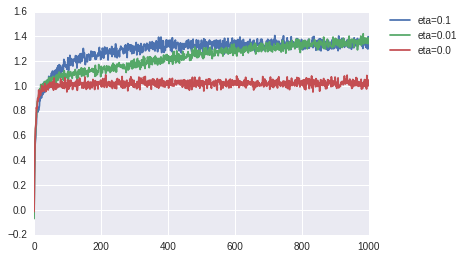

In [27]:
t = range(max_t)
plt.plot(t,a1.averageRewardHistory,label='eta=0.1')
plt.plot(t,a2.averageRewardHistory,label='eta=0.01')
plt.plot(t,a3.averageRewardHistory,label='eta=0.0')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

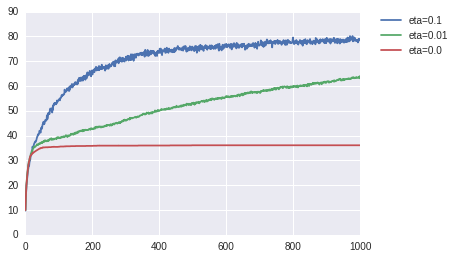

In [28]:
plt.plot(t,a1.averageOptimalHistory,label='eta=0.1')
plt.plot(t,a2.averageOptimalHistory,label='eta=0.01')
plt.plot(t,a3.averageOptimalHistory,label='eta=0.0')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()